# 5. Evaluation Metric

## 5-1. 들어가며
### 학습 내용
---

1. Loss와 Metric
- Loss와 Metric의 차이는 무엇일까요?
2. Confusion Matrix 와 Precision/Recall
- Confusion Matrix 와 Precision/Recall의 개념에 대해 알아봅니다.
3. Threshold의 변화에 따른 모델 성능
- Threshold를 변경하며 모델 성능을 확인하는 실습을 해봅니다.
4. Precision-Recall 커브
- Precision-Recall 커브를 직접 코드로 그려보며 알아봅니다.
5. ROC 커브
- ROC 커브에 대해 살펴봅니다.
6. 다양한 머신러닝 모델의 평가척도
- 이외에도 몇 가지 평가척도에 대해 살펴봅니다.

### 학습 목표
---
1. 머신러닝 학습 결과를 평가할 수 있습니다.
2. Precision과 Recall의 관계를 이해할 수 있습니다
3. AUC 영역을 통해 모델 간의 퍼포먼스를 비교할 수 있습니다.

## 5-2. Loss와 Metric

- Loss : 모델 학습시 학습데이터(train data) 를 바탕으로 계산되어, 모델의 파라미터 업데이트에 활용되는 함수
- Metric : 모델 학습 종료 후 테스트데이터(test data) 를 바탕으로 계산되어, 학습된 모델의 성능을 평가하는데 활용되는 함수

- Loss vs Accuracy (https://modulabs.co.kr/blog/loss-versus-accuracy/)

## 5-3. Confusion Matrix와 Precision/Recall
**Confusion Matrix**
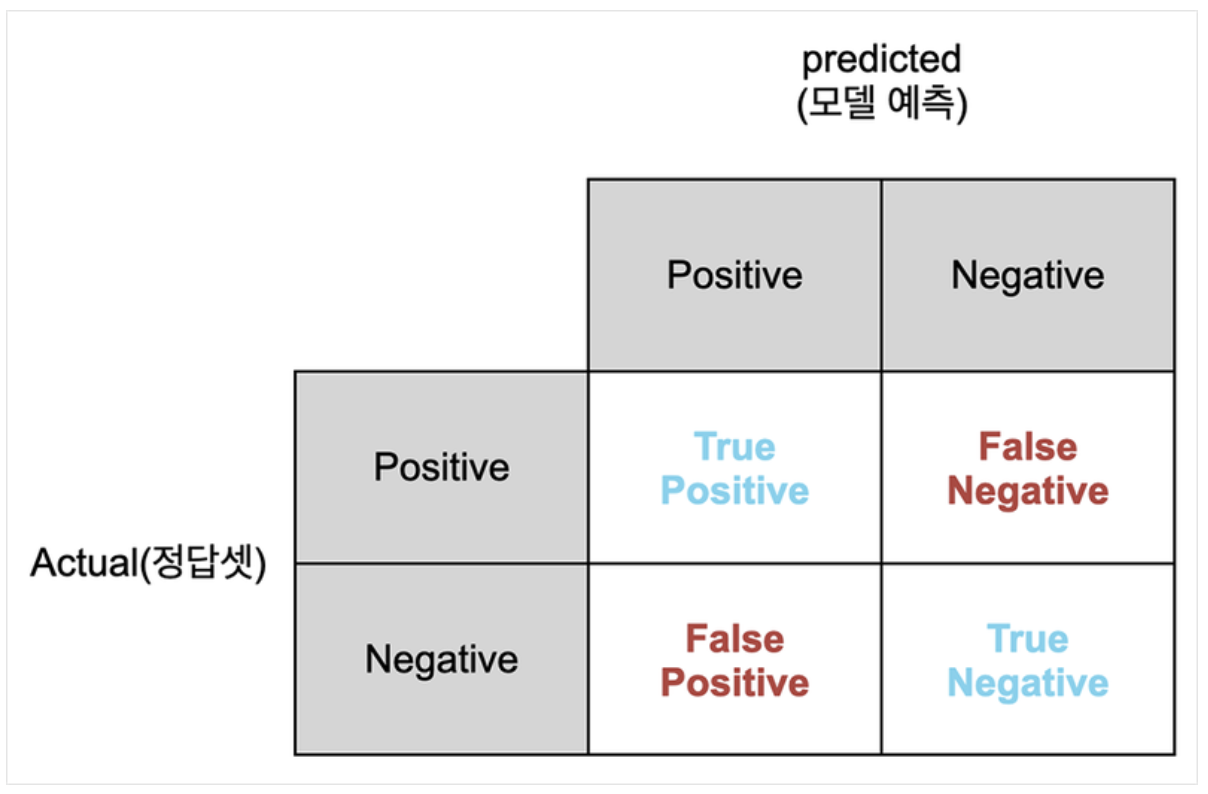

- True Positive (TP) - 모델이 양성(Positive)을 양성으로 맞혔을 때
- True Negative (TN) - 모델이 음성(Negative)을 음성으로 맞혔을 때
- False Positive (FP) - 모델이 음성(Negative)을 양성(Positive)으로 잘못 예측했을 때
- False Negative (FN) - 모델이 양성(Positive)을 음성(Negative)으로 잘못 예측했을 때

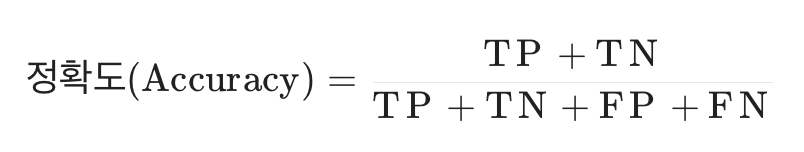

### Precision과 Recall
---

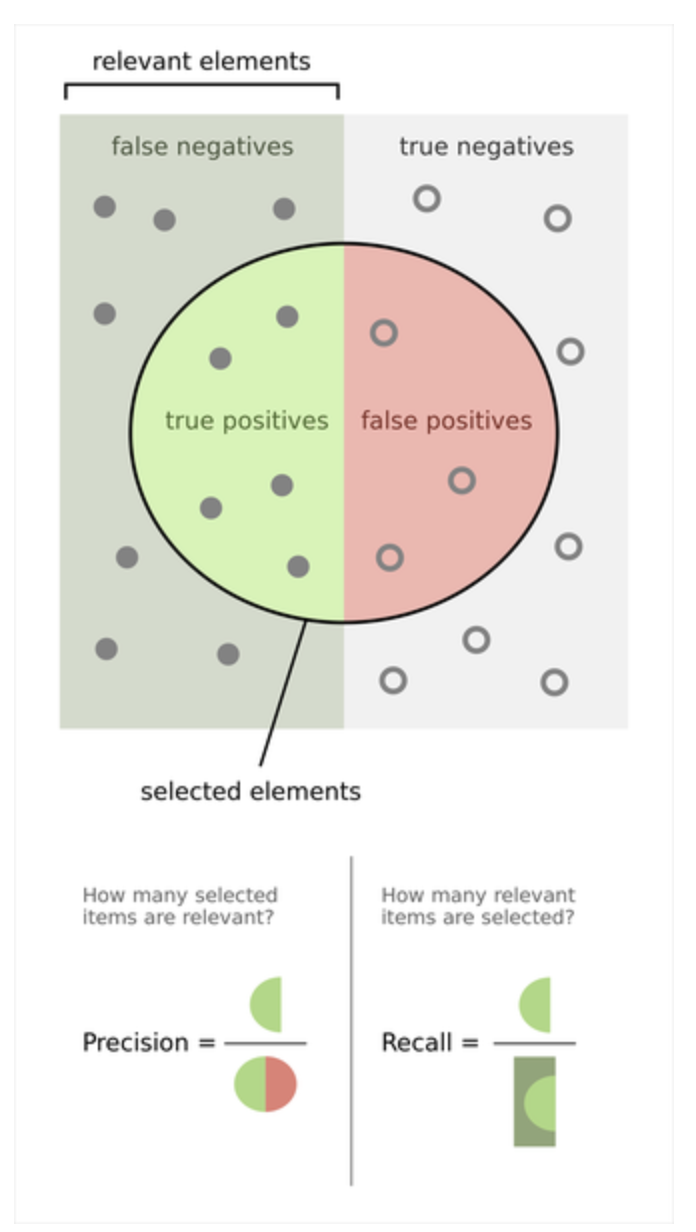

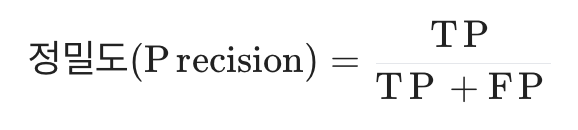

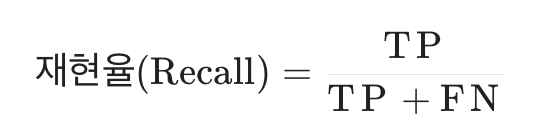

**F-score**
- Precision과 Recall은 단독으로 평가 척도로 사용하기에 부족함.
    - 스팸 메일 분류기에서 FP(스팸이 아닌데 스팸으로 되는 상황)을 줄이기 위해 N으로 판단하는 게 좋은데, 그렇다고 FN을 무한히 허용하면 스팸 메일 분류기 자체가 쓸모가 없음
    - 암환자를 음성으로 분류하면 큰일이기에 FN을 최소화하면 좋으나, 모두 양성으로 진단해버리면 아무 의미가 없는 모델임.
    
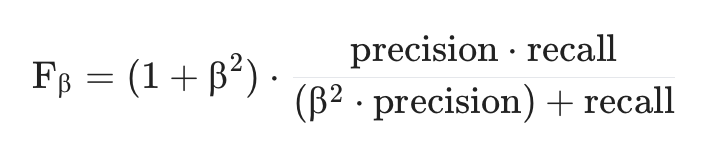

- F1 score는 Precision과 Recall의 조화평균이 되는 값으로서, Precision과 Recall 둘 다 고려할 수 있어서 분류 모델의 훌륭한 척도가 됨.

## 5-4. Threshold의 변화에 따른 모델 성능

- 이렇게 Threshold가 달라지는 것을 고려하여 전체적인 모델의 성능을 평가하는 방법으로 PR(Precision and Recall) 커브와 ROC(Receiver Operating Characteristic) 커브를 그려보는 두가지 방법이 있음.

### 실습에 사용할 데이터 준비
---
- 붓꽃 데이터 (https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

In [1]:
from sklearn import datasets

from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape)  # 4개의 feature를 가진 150개의 데이터입니다.

(150, 4)


### Task의 재구성
---

In [2]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

print(X.shape)  # 804개의 feature를 가진 150개의 데이터가 되었습니다.

(150, 804)


In [6]:
#- 0, 1 라벨에 속하는 붓꽃 샘플만 사용하도록 제한합니다.
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

print("훈련, 테스트 셋에 사용된 라벨의 종류: {} ".format( set(y_test)))
print("훈련 데이터 shape   :", X_train.shape)
print("테스트 데이터 shape :", X_test.shape)

훈련, 테스트 셋에 사용된 라벨의 종류: {0, 1} 
훈련 데이터 shape   : (50, 804)
테스트 데이터 shape : (50, 804)


### 모델 학습
---

In [7]:
from sklearn import svm

# SVM(Support Vector Machine)으로 모델 학습
classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.48

In [8]:
classifier = svm.SVC(kernel='linear', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.8

In [9]:
classifier.predict(X_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1])

In [10]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0])

In [11]:
y_score = classifier.decision_function(X_test)
print(y_score)

[-0.29512751  0.28798352  0.17635465  0.19056886  0.38391605 -0.30841065
 -0.10084254 -0.23481309  0.18576987 -0.36011033 -0.15726747 -0.25714889
 -0.14979669  0.02063898  0.04509171 -0.17239443  0.07287957 -0.0689103
 -0.13452462 -0.30697712  0.25404241 -0.28916471 -0.52061453  0.25252233
  0.02177777 -0.10980907  0.37468422  0.35303004 -0.6211302  -0.42920064
 -0.14770647  0.00593404 -0.34735296  0.32245409 -0.19439024  0.1288847
 -0.0320947  -0.23008604 -0.10135548 -0.46962186  0.05184235  0.0609688
  0.05632596  0.44769206 -0.38804349  0.24704844  0.16063684  0.0144203
 -0.03136574  0.11179177]


In [12]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred)
print(rpt_result)

[[20  4]
 [ 6 20]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.83      0.77      0.80        26

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



In [13]:
y_pred_new_threshold = classifier.decision_function(X_test) > -0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[18  6]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.78      0.81      0.79        26

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



In [14]:
y_pred_new_threshold = classifier.decision_function(X_test) > -0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[12 12]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        24
           1       0.67      0.92      0.77        26

    accuracy                           0.72        50
   macro avg       0.76      0.71      0.70        50
weighted avg       0.76      0.72      0.71        50



In [15]:
y_pred_new_threshold = classifier.decision_function(X_test) > 0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[23  1]
 [12 14]]
              precision    recall  f1-score   support

           0       0.66      0.96      0.78        24
           1       0.93      0.54      0.68        26

    accuracy                           0.74        50
   macro avg       0.80      0.75      0.73        50
weighted avg       0.80      0.74      0.73        50



In [16]:
y_pred_new_threshold = classifier.decision_function(X_test) > 0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[24  0]
 [17  9]]
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        24
           1       1.00      0.35      0.51        26

    accuracy                           0.66        50
   macro avg       0.79      0.67      0.63        50
weighted avg       0.80      0.66      0.62        50



## 5-5. Precision-Recall 커브

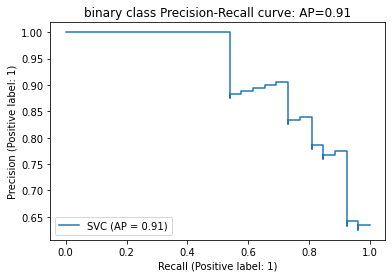

In [17]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

disp = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(disp.average_precision))

plt.show()

위 그림을 보면 Precision과 Recall 사이의 트레이드오프 관계를 확인할 수 있습니다. Threshold값에 따라 우리가 얻게 되는 Precision, Recall 값은 저 그래프상의 어딘가가 될 것입니다. 물론 우리가 원하는 값은 Precision이든 Recall이든 모두 1에 가깝기를 원합니다. 이상적으로는 그래프가 (1, 1)에 찍히면 좋겠습니다만, 가급적 위 그래프가 (1, 1)에 근접하도록 그려지길 바랍니다.

그래서 Threshold 값에 무관하게 모델의 전체적인 성능을 평가하는 방법으로, 위 PR 커브 아래쪽 면적을 계산하는 방법이 있습니다. 이것을 AUC(Area Under Curve) 값이라고 합니다. PR AUC를 계산하는 방법으로 다음과 같이 사이킷런에서 제공하는 average_precision_score 함수를 사용합니다.

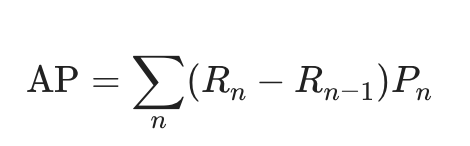

위 수식의 특성을 살펴보면, average_precision_score(AP) 값은, n 값을 무한히 크게 한다면 아주 작은 Recall 구간에 대해 Pn 값을 적분하는 것과 같게 됩니다. 그러므로 PR 커브의 아래쪽 면적인 PR AUC와 같은 의미가 되겠군요. 하지만 사이킷런 문서에서는 average_precision_score와 PR AUC가 구현 측면에서 약간 다르다고 설명하고 있습니다. 두 개념이 의미적으로 비슷하게 사용될 수 있다고만 이해하면 될 것 같습니다.

In [18]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

평균 precision-recall score: 0.91


In [20]:
# Q. 모델을 SVM의 'poly' 커널을 사용하여 average_precision_score를 구하세요.
from sklearn.metrics import average_precision_score

classifier = svm.SVC(kernel = 'poly', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

평균 precision-recall score: 0.90


Text(0.5, 1.0, 'binary class Precision-Recall curve: AP=0.90')

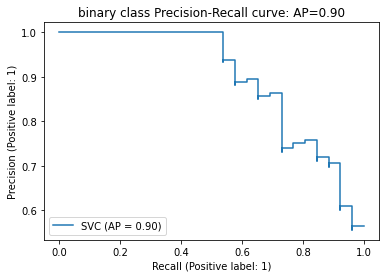

In [21]:
disp = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

## 5-6. ROC 커브

### ROC 예시 곡선
---
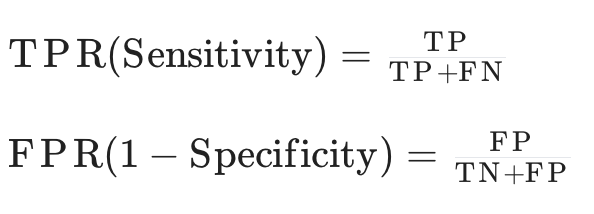

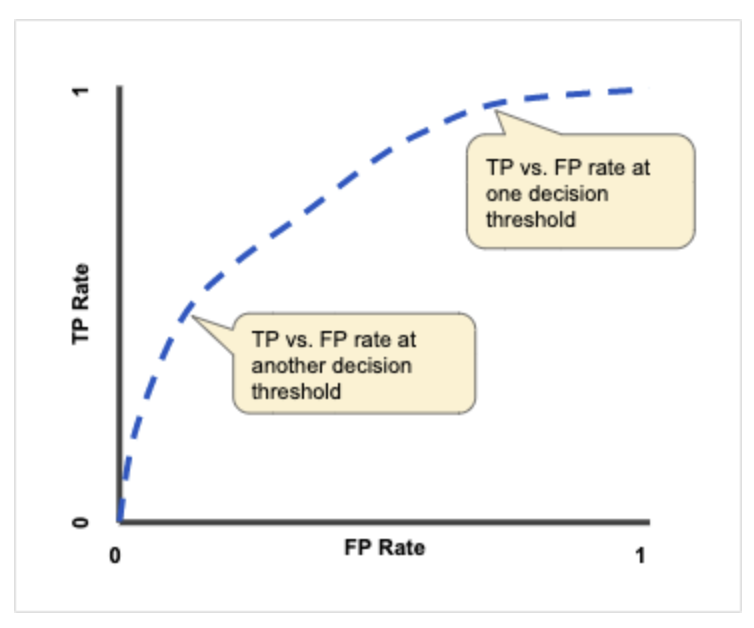

### AUC 예시 영역
---

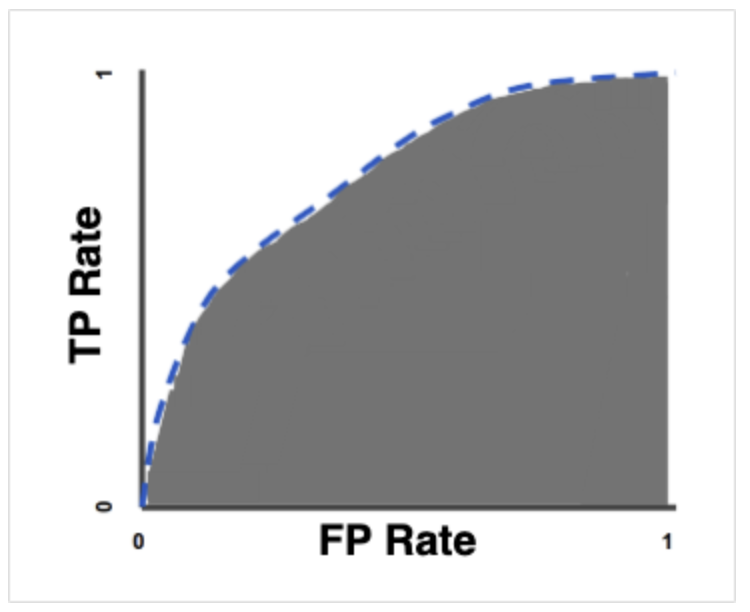



In [22]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

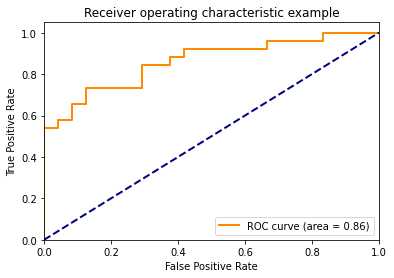

auc result:0.8605769230769231


In [23]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

아주 이상적으로 Precision과 Recall이 전부 1이 되는 완벽한 모델이라면 ROC 커브에서는 어디에 점이 찍힐까요? 네, 바로 (0, 1)일 것입니다. 양성과 음성에 대한 Recall이 모두 1이 될 테니 TPR은 1, FPR은 0이 될 것입니다.

몇가지 극단적인 경우를 생각해 봅시다. 모델이 모든 샘플에 대해 양성이라고 분류한다면 어떨까요? 이땐 이 분류기가 (1, 1)에 찍힐 것입니다. 반대로 모든 샘플에 대해 음성이라고 분류한다면 이 분류기는 (0, 0)에 찍힐 것입니다.
 이번엔 완벽한 랜덤 분류기를 가정해 봅시다. 이 분류기는 양성이든 음성이든 무관하게 p의 확률로 양성이라고 분류할 것입니다. 이 랜덤분류기의 Recall은 p가 될 것입니다. 음성에 대한 Recall도 p가 될 테니 이 분류기는 (p, 1-p)에 찍힐 것입니다.

위 그래프에서 (0, 0)과 (1, 1)을 잇는 파란 점선은 바로 위와 같은 극단적인 경우들만 모아놓은 경우입니다. 그래서 의미있는 분류기라면 적어도 이 파란 점선보다는 위쪽에 그려져야 하며, 가급적 (0, 1)에 가깝게 그려질 수록 우수한 분류기가 됩니다. 그러므로 ROC AUC가 클수록 상대적으로 좋은 성능의 모델이라고 할 수 있을 것입니다.

ROC AUC 값도 최대 1이 될 수 있을 것입니다. 위에서는 0.89 정도가 나왔군요. 이번에도 SVM 커널의 종류를 바꿔 가며 ROC 커브를 그리고 ROC AUC 값을 구하는 코드를 직접 작성해 봅시다.

평균 precision-recall score: 0.91


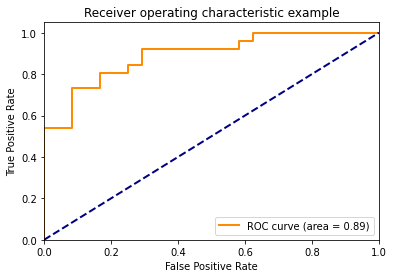

auc result:0.8926282051282052


In [24]:
# SVM 커널의 종류를 바꿔 가며 ROC 커브를 그리고 ROC AUC 값을 구하는 코드를 직접 작성해보세요.
from sklearn.metrics import average_precision_score

classifier = svm.SVC(kernel = 'linear', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

## 5-7. 다양한 머신러닝 모델의 평가척도

### 회귀 모델의 평가척도
---

회귀의 오류 지표 알아보기 (https://modulabs.co.kr/blog/regression_metrics_mae_mse/)

### 랭킹 모델의 평가척도
---
정보 검색(Information Retrieval) 평가 방법: MAP, MRR, DCG, NDCG (https://modulabs.co.kr/blog/information-retrieval-map-ndcg/)

### 이미지 생성 모델의 평가척도
---
이미지 간 유사성 측정하는 방법 (https://modulabs.co.kr/blog/how-to-measure-similarity/)

### 기계번역 모델의 평가척도
---
BLEU : 기계번역에서 많이 사용하는 지표 (https://modulabs.co.kr/blog/bleu-machine-translation/)

